# Decision Trees

## Objetivos

Desenvolva um modelo de classificação usando algoritmo de árvore de decisão
Neste exercício de laboratório, você aprenderá um algoritmo popular de aprendizado de máquina, árvores de decisão. Você usará esse algoritmo de classificação para construir um modelo a partir dos dados históricos dos pacientes e de suas respostas a diferentes medicamentos. Em seguida, você usará a árvore de decisão treinada para prever a classe de um paciente desconhecido ou para encontrar um medicamento adequado para um novo paciente.

Importe as seguintes bibliotecas:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>



In [1]:
# Suprimir avisos:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

## Sobre o conjunto de dados

Imagine que você é um pesquisador médico compilando dados para um estudo. Você coletou dados sobre um conjunto de pacientes, todos sofrendo da mesma doença. Durante o tratamento, cada paciente respondeu a um dos 5 medicamentos, Medicamento A, Medicamento B, Medicamento c, Medicamento x e y.

Parte do seu trabalho é construir um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com a mesma doença. As características deste conjunto de dados são idade, sexo, pressão arterial e colesterol dos pacientes, e o alvo é o medicamento ao qual cada paciente respondeu.

É uma amostra de classificador multiclasse e você pode usar a parte de treinamento do conjunto de dados para construir uma árvore de decisão e, em seguida, usá-la para prever a classe de um paciente desconhecido ou para prescrever um medicamento a um novo paciente.

## Baixando os dados

Para baixar os dados, usaremos a biblioteca pandas para lê-los diretamente em um dataframe do IBM Object Storage.

In [3]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Prática

Qual é o tamanho dos dados?

In [4]:
my_data.shape

(200, 6)

## Pré-processando

Usando my_data como dados Drug.csv lidos pelos pandas, declare as seguintes variáveis:

X como a matriz de recursos (dados de my_data)

y como o vetor de resposta (alvo)

Remova a coluna que contém o nome do destino, pois ela não contém valores numéricos.

In [34]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


Como você pode perceber, alguns recursos neste conjunto de dados são categóricos, como Sexo ou PA. Infelizmente, Sklearn Decision Trees não lida com variáveis ​​​​categóricas. Ainda podemos converter esses recursos em valores numéricos usando o método LabelEncoder() para converter a variável categórica em variáveis ​​fictícias/indicadoras.

In [35]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])



LabelEncoder()

In [36]:
X.iloc[:,1] = le_sex.transform(X.iloc[:,1]) 

In [37]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])


LabelEncoder()

In [38]:
X.iloc[:,2] = le_BP.transform(X.iloc[:,2])


In [39]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])

LabelEncoder()

In [40]:
X.iloc[:,3] = le_Chol.transform(X.iloc[:,3]) 


In [41]:
X[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


Agora podemos preencher a variável de destino.

In [42]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Configurando a Árvore de Decisão

Estaremos usando a divisão treino/teste em nossa árvore de decisão. 

Vamos importar train_test_split de sklearn.cross_validation.

In [25]:
from sklearn.model_selection import train_test_split

Agora train_test_split retornará 4 parâmetros diferentes. Vamos nomeá-los:

X_trainset, X_testset, y_trainset, y_testset

O train_test_split precisará dos parâmetros:

X, y, test_size=0,3 e random_state=3.

Os X e y são os arrays necessários antes da divisão, o test_size representa a proporção do conjunto de dados de teste e o random_state garante que obteremos as mesmas divisões.

In [43]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Imprima a forma de X_trainset e y_trainset. Certifique-se de que as dimensões correspondam.

In [44]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


Imprima a forma de X_testset e y_testset. Certifique-se de que as dimensões correspondam.

In [45]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (60, 5) &  Size of Y training set (60,)


## Modelagem

Primeiro criaremos uma instância do DecisionTreeClassifier chamada drugTree.

Dentro do classificador, especifique critério = "entropia" para que possamos ver o ganho de informação de cada nó.

In [46]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugTree # isso mostra os parametros de default

DecisionTreeClassifier(criterion='entropy', max_depth=4)

A seguir, ajustaremos os dados com a matriz de recursos de treinamento X_trainset e o vetor de resposta de treinamento y_trainset

In [47]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Predição

Vamos fazer algumas previsões no conjunto de dados de teste e armazená-lo em uma variável chamada predTree.

In [48]:
predTree = drugTree.predict(X_testset)


Você pode imprimir predTree e y_testset se quiser comparar visualmente as previsões com os valores reais.

In [49]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Avaliação

A seguir, vamos importar métricas do sklearn e verificar a precisão do nosso modelo.

In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('Decision Trees Accuracy: ', metrics.accuracy_score(y_testset, predTree))

Decision Trees Accuracy:  0.9833333333333333


A pontuação de classificação de precisão calcula a precisão do subconjunto: o conjunto de rótulos previstos para uma amostra deve corresponder exatamente ao conjunto correspondente de rótulos em y_true.

Na classificação multirrótulo, a função retorna a precisão do subconjunto. Se todo o conjunto de rótulos previstos para uma amostra corresponder estritamente ao conjunto verdadeiro de rótulos, a precisão do subconjunto será 1,0; caso contrário, é 0,0.



## Visualização

Vamos visualizar a árvore

In [ ]:
# Aviso: pode ser necessário descomentar e instalar as bibliotecas pydotplus e graphviz se ainda não as tiver instalado
#!conda instalar -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

#Após executar o código abaixo, seria gerado um arquivo chamado 'tree.png' que contém a imagem da árvore de decisão.

In [51]:
#from sklearn.tree import export_graphviz
#export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
#!dot -Tpng tree.dot -o tree.png


'dot' is not recognized as an internal or external command,
operable program or batch file.


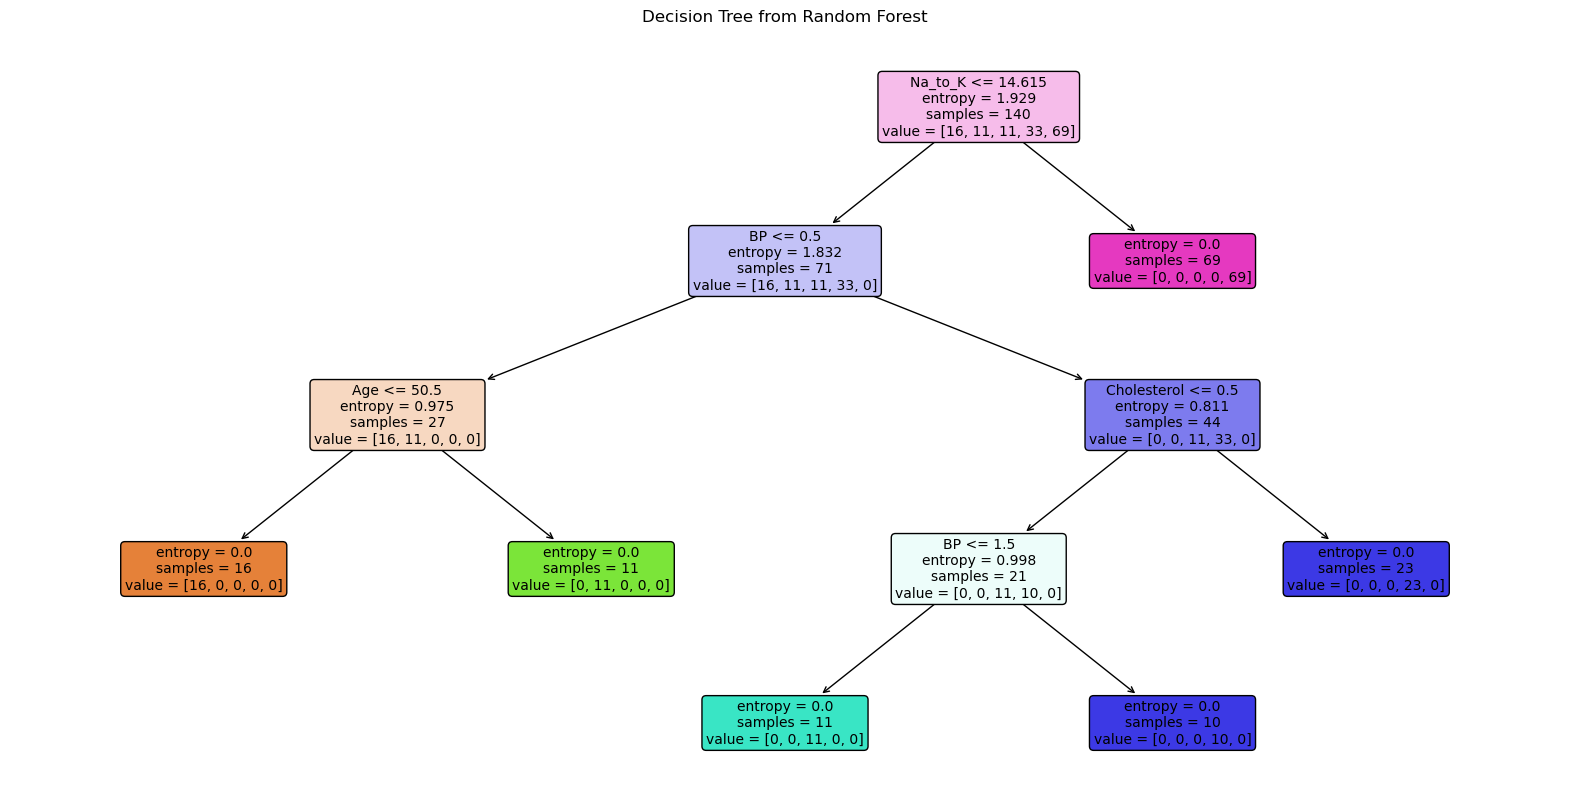

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(drugTree,  feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()